##  Data Analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("DublinCrimen.csv")


In [3]:
num_rows, num_cols = df.shape
print("Number of Rows:", num_rows)
print("Number of Columns (Attributes):", num_cols)

Number of Rows: 163016
Number of Columns (Attributes): 6


In [4]:
# Columns types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163016 entries, 0 to 163015
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   STATISTIC Label  163016 non-null  object
 1   Quarter          163016 non-null  object
 2   Garda Division   163016 non-null  object
 3   Type of Offence  163016 non-null  object
 4   UNIT             163016 non-null  object
 5   VALUE            163016 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 7.5+ MB


In [6]:
#analysing head dataframe
df.head()

,STATISTIC Label,Quarter,Garda Division,Type of Offence,UNIT,VALUE
0,Recorded crime incidents (Under Reservation),2003Q1,Cavan/Monaghan Garda Division,Homicide offences,Number,1
1,Recorded crime incidents (Under Reservation),2003Q1,Cavan/Monaghan Garda Division,Murder,Number,0
2,Recorded crime incidents (Under Reservation),2003Q1,Cavan/Monaghan Garda Division,Manslaughter,Number,0
3,Recorded crime incidents (Under Reservation),2003Q1,Cavan/Monaghan Garda Division,Infanticide,Number,0
4,Recorded crime incidents (Under Reservation),2003Q1,Cavan/Monaghan Garda Division,Dangerous driving leading to death,Number,1


In [7]:
#analysing tail dataframe
df.tail()

,STATISTIC Label,Quarter,Garda Division,Type of Offence,UNIT,VALUE
163011,Recorded crime incidents (Under Reservation),2023Q2,D.M.R. Western Garda Division,"Offences against government, justice procedure...",Number,367
163012,Recorded crime incidents (Under Reservation),2023Q2,D.M.R. Western Garda Division,Offences against government and its agents,Number,3
163013,Recorded crime incidents (Under Reservation),2023Q2,D.M.R. Western Garda Division,Organisation of crime and conspiracy to commit...,Number,0
163014,Recorded crime incidents (Under Reservation),2023Q2,D.M.R. Western Garda Division,Perverting the course of justice,Number,1
163015,Recorded crime incidents (Under Reservation),2023Q2,D.M.R. Western Garda Division,"Offences while in custody, breach of court orders",Number,363


In [8]:
df.isnull().sum()

STATISTIC Label    0
Quarter            0
Garda Division     0
Type of Offence    0
UNIT               0
VALUE              0
dtype: int64

# Data Preparation
  Removing unnecessary columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163016 entries, 0 to 163015
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   STATISTIC Label  163016 non-null  object
 1   Quarter          163016 non-null  object
 2   Garda Division   163016 non-null  object
 3   Type of Offence  163016 non-null  object
 4   UNIT             163016 non-null  object
 5   VALUE            163016 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 7.5+ MB


In [10]:
df["STATISTIC Label"].unique()

array(['Recorded crime incidents (Under Reservation)'], dtype=object)

In [11]:
df = df.drop(["STATISTIC Label"], axis=1)

In [12]:
df["UNIT"].unique()

array(['Number'], dtype=object)

In [13]:
df = df.drop(["UNIT"], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163016 entries, 0 to 163015
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Quarter          163016 non-null  object
 1   Garda Division   163016 non-null  object
 2   Type of Offence  163016 non-null  object
 3   VALUE            163016 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


# Characterisation of the dataset

In [15]:
#check if has null values in target column
df.isnull().sum()

Quarter            0
Garda Division     0
Type of Offence    0
VALUE              0
dtype: int64

In [16]:
#check if has zero values in target column
df[df["VALUE"] == 0].shape

(49988, 4)

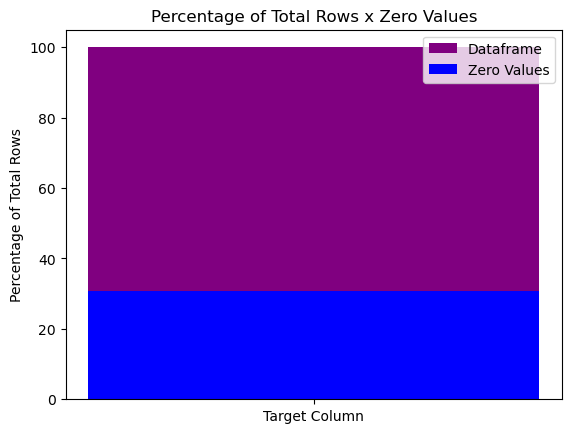

In [17]:
 import matplotlib.pyplot as plt
# Create two dataframes: one for the entire data and another for zero values
target = df[["VALUE"]]
zero_values = target[target["VALUE"] == 0]
# Values to compare
values_to_compare = [100, zero_values.shape[0] / target.shape[0] * 100]
# Plot the values in the same candlestick
plt.bar('Target Column', values_to_compare[0], color='purple', label='Dataframe')
plt.bar('Target Column', values_to_compare[1], color='blue', label='Zero Values')
# Customize the plot
plt.ylabel('Percentage of Total Rows')
plt.title('Percentage of Total Rows x Zero Values')
plt.legend()
# Show the plot
plt.show()

In [18]:
 #remove zero values on target column
df = df[df["VALUE"] != 0]

# Size, number of attributes, number of observations

In [19]:
num_rows, num_cols = df.shape
print("Number of Rows:", num_rows)
print("Number of Columns (Attributes):", num_cols)

Number of Rows: 113028
Number of Columns (Attributes): 4


# EDA and Visualizations

Filtering Garda Divisions

In [20]:
#list Garda divisions of dataset
df["Garda Division"].unique()

array(['Cavan/Monaghan Garda Division', 'Donegal Garda Division',
       'Sligo/Leitrim Garda Division', 'Louth Garda Division',
       'Clare Garda Division', 'Mayo Garda Division',
       'Galway Garda Division', 'Roscommon/Longford Garda Division',
       'Cork City Garda Division', 'Cork North Garda Division',
       'Cork West Garda Division', 'Kerry Garda Division',
       'Limerick Garda Division', 'Laois/Offaly Garda Division',
       'Meath Garda Division', 'Wicklow Garda Division',
       'Westmeath Garda Division', 'Kildare Garda Division',
       'Tipperary Garda Division', 'Wexford Garda Division',
       'Kilkenny/Carlow Garda Division', 'Waterford Garda Division',
       'D.M.R. South Central Garda Division',
       'D.M.R. North Central Garda Division',
       'D.M.R. Northern Garda Division', 'D.M.R. Southern Garda Division',
       'D.M.R. Eastern Garda Division', 'D.M.R. Western Garda Division'],
      dtype=object)

In [21]:
#creating a new dataframe with Dublin divisions
dublin_divisions = ["D.M.R. South Central Garda Division",
"D.M.R. North Central Garda Division",
"D.M.R. Northern Garda Division",
"D.M.R. Southern Garda Division",
"D.M.R. Eastern Garda Division",
"D.M.R. Western Garda Division"]
df = df[df["Garda Division"].isin(dublin_divisions)]

In [22]:
df["Garda Division"].unique()

array(['D.M.R. South Central Garda Division',
       'D.M.R. North Central Garda Division',
       'D.M.R. Northern Garda Division', 'D.M.R. Southern Garda Division',
       'D.M.R. Eastern Garda Division', 'D.M.R. Western Garda Division'],
      dtype=object)

# Filtering Crime Offences

In [23]:
df["Type of Offence"].unique()

array(['Homicide offences', 'Murder', 'Manslaughter', 'Sexual offences',
       'Rape and sexual assault',
       'Attempts/threats to murder, assaults, harassments and related offences',
       'Harassment and related offences',
       'Assault causing harm, poisoning', 'Other assault',
       'Dangerous or negligent acts',
       'Driving/in charge of a vehicle while over legal alcohol limit',
       'Endangering traffic offences',
       'Robbery, extortion and hijacking offences',
       'Robbery of an establishment or institution',
       'Robbery of cash or goods in transit', 'Robbery from the person',
       'Carjacking, hijacking/unlawful seizure of aircraft/vessel',
       'Burglary and related offences', 'Aggravated burglary',
       'Burglary (not aggravated)',
       'Possession of an article (with intent to burgle, steal, demand)',
       'Theft and related offences',
       'Theft/taking of vehicle and related offences',
       'Theft from person', 'Theft from shop',
    

In [24]:
df["Type of Offence"].nunique()

71

In [25]:
offences = ["Homicide offences","Murder","Manslaughter","Sexual offences","Rape and sexual assault"]
df = df[df["Type of Offence"].isin(offences)]

In [26]:
df["Type of Offence"].unique()

array(['Homicide offences', 'Murder', 'Manslaughter', 'Sexual offences',
       'Rape and sexual assault'], dtype=object)

# Crimes in Dublin from 2003-Q1 to 2023-Q2

<Figure size 1200x800 with 0 Axes>

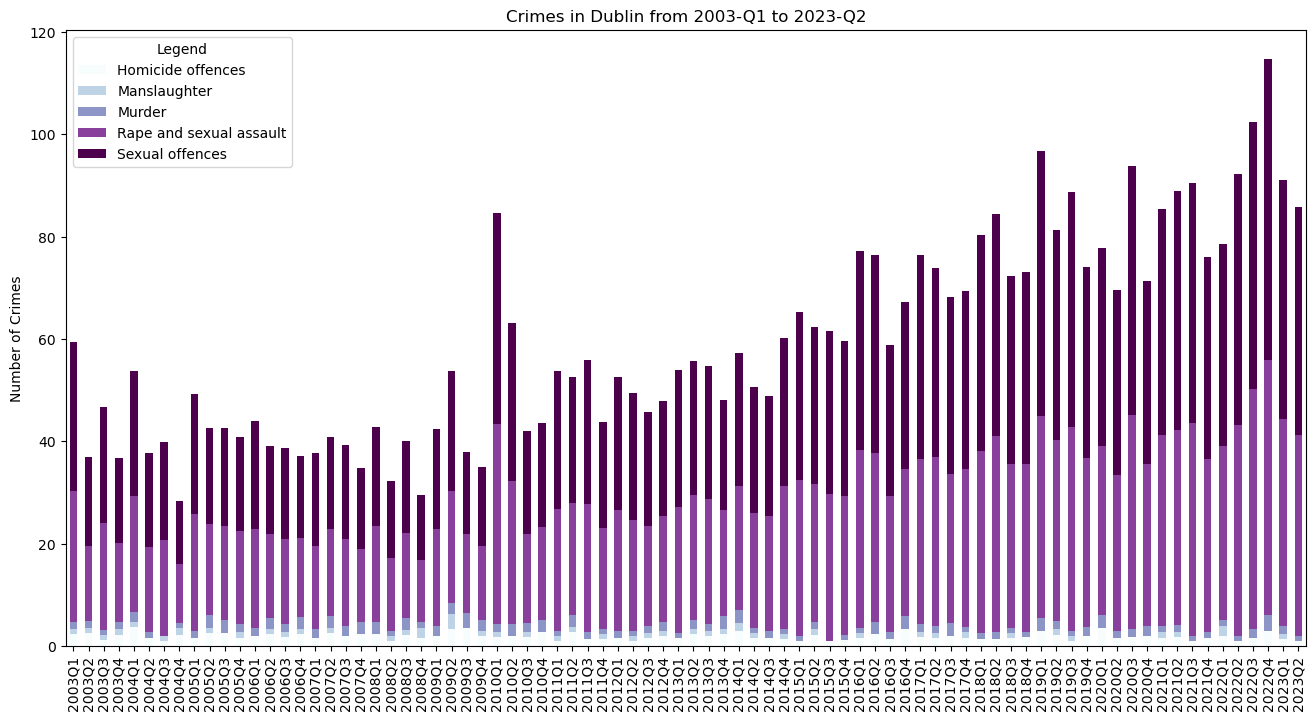

In [27]:
import matplotlib.pyplot as plt
pivot_df = df.pivot_table(index=['Quarter'], columns='Type of Offence', values='VALUE', fill_value=0)
plt.figure(figsize=(12, 8))
pivot_df.plot(kind='bar', stacked=True, colormap='BuPu', figsize=(16, 8))
plt.title('Crimes in Dublin from 2003-Q1 to 2023-Q2')
plt.xlabel('')
plt.ylabel('Number of Crimes')
plt.legend(title='Legend')
plt.show()

In [28]:
eastern_central = df[df["Garda Division"] == "D.M.R. Eastern Central Garda Division"]
western_central = df[df["Garda Division"] == "D.M.R. Western Central Garda Division"]
northern_central = df[df["Garda Division"] == "D.M.R. Northern Central Garda Division"]
north_central = df[df["Garda Division"] == "D.M.R. North Central Garda Division"]
southern_central = df[df["Garda Division"] == "D.M.R. Southern Central Garda Division"]
south_central = df[df["Garda Division"] == "D.M.R. South Central Garda Division"]



# Splitting relevant features

In [29]:
categorical_features = df[['Quarter', 'Garda Division', 'Type of Offence']]
target = df['VALUE']

In [30]:
categorical_features

,Quarter,Garda Division,Type of Offence
1562,2003Q1,D.M.R. South Central Garda Division,Homicide offences
1563,2003Q1,D.M.R. South Central Garda Division,Murder
1564,2003Q1,D.M.R. South Central Garda Division,Manslaughter
1567,2003Q1,D.M.R. South Central Garda Division,Sexual offences
1568,2003Q1,D.M.R. South Central Garda Division,Rape and sexual assault
...,...,...,...
162880,2023Q2,D.M.R. Eastern Garda Division,Rape and sexual assault
162945,2023Q2,D.M.R. Western Garda Division,Homicide offences
162946,2023Q2,D.M.R. Western Garda Division,Murder
162950,2023Q2,D.M.R. Western Garda Division,Sexual offences


In [31]:
target

1562       2
1563       1
1564       1
1567      13
1568      13
          ..
162880    23
162945     1
162946     1
162950    45
162951    34
Name: VALUE, Length: 1597, dtype: int64

# Converting categorical features in numericalfeatures

In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = pd.DataFrame()
features['Quarter'] = le.fit_transform(categorical_features['Quarter'])
features['Garda Division'] = le.fit_transform(categorical_features['Garda Division'])
features['Type of Offence'] = le.fit_transform(categorical_features['Type of Offence'])

In [33]:
features

,Quarter,Garda Division,Type of Offence
0,0,3,0
1,0,3,2
2,0,3,1
3,0,3,4
4,0,3,3
...,...,...,...
1592,81,0,3
1593,81,5,0
1594,81,5,2
1595,81,5,4


# PCA to Establish Minimum Number of Features

In [34]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(features)

PCA()

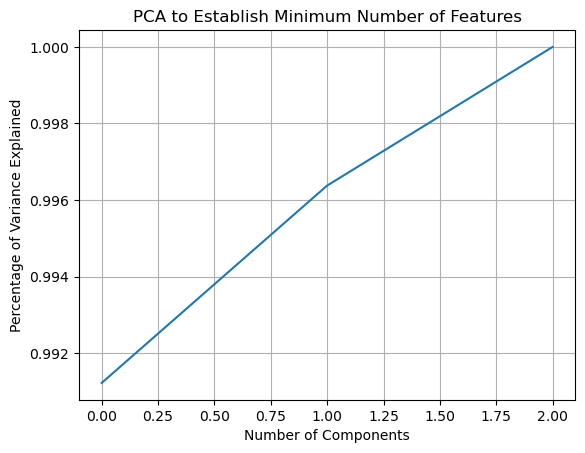

In [35]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('PCA to Establish Minimum Number of Features')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance Explained');
plt.grid(True)

# Implement PCA to Dimensionally Reduce the Data to the Number of Features

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(3)
features_pca = pca.fit_transform(features_scaled)

In [38]:
reduced_features = pd.DataFrame(features_pca, columns =['C1', 'C2', 'C3'])
reduced_features.head()

,C1,C2,C3
0,1.989623,1.266969,0.469470
1,1.018266,1.277795,-0.510443
2,1.503944,1.272382,-0.020487
3,0.046908,1.288620,-1.490357
4,0.532587,1.283208,-1.000400


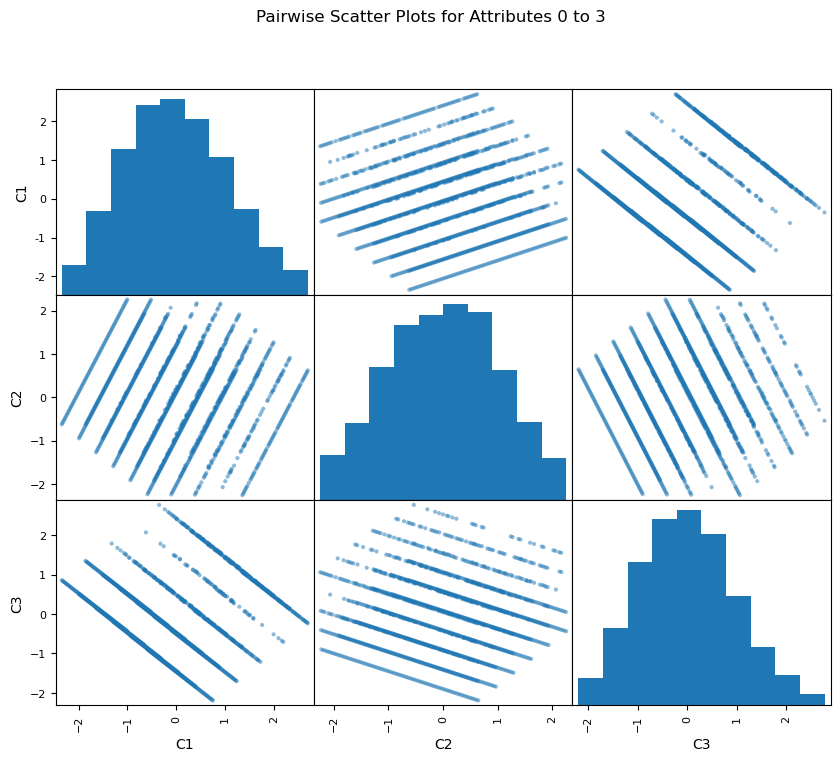

In [39]:
from pandas.plotting import scatter_matrix
scatter_matrix(reduced_features.iloc[:, 0:3], alpha=0.5, figsize=(10, 8))
plt.suptitle("Pairwise Scatter Plots for Attributes 0 to 3")
plt.show()

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
from sklearn.model_selection import train_test_split

X = reduced_features
y = target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [43]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [44]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('\n%s\nMean: %f\nStandard Deviation: %f' % (name, cv_results.mean(), cv_results.std()))


LR
Mean: 0.264665
Standard Deviation: 0.013132

LDA
Mean: 0.280315
Standard Deviation: 0.012826

KNN
Mean: 0.265471
Standard Deviation: 0.016981

CART
Mean: 0.241972
Standard Deviation: 0.015368

NB
Mean: 0.267784
Standard Deviation: 0.019622

SVM
Mean: 0.275621
Standard Deviation: 0.014267


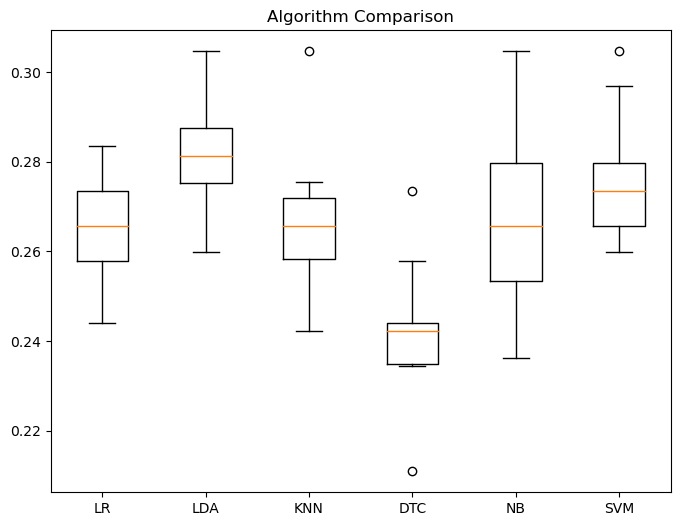

In [45]:
plt.figure(figsize=(8, 6))
plt.boxplot(results, labels=['LR', 'LDA', 'KNN', 'DTC', 'NB', 'SVM'])
plt.title('Algorithm Comparison')
plt.show()